Let's test things out on a single target: HD65426

In [1]:
age = 14 #Myr
distance = 104 #pc
spt = "A0V"
kmag = 5.8

# First let's try to get the JWST mag in a given filter

In [2]:
from jwst import *

In [3]:
os.environ['PYSYN_CDBS']='/Users/connorvancil/Desktop/AstroResearch/Data/trds/'

instrument='nircam'
instrument_mask = 'mask335r'
jwst_filt = 'f444w'

tst = get_jwst_mag(spt,kmag,instrument,jwst_filt,filter_dir="./",jwst_mask=instrument_mask,
                norm_filter='bessel_k')
print(tst)

That seems reasonable! Now, read in the contrast curve for the desired filter and plot minimum detectable planet magnitude.

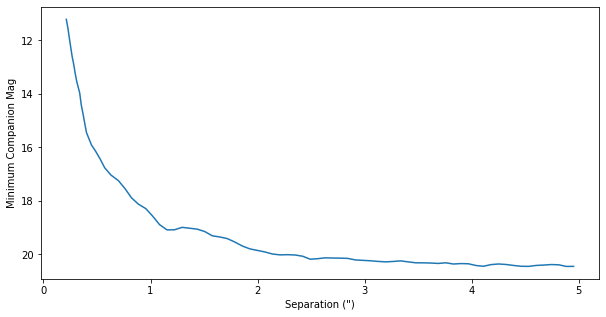

In [4]:
contrast_curves=read_contrast_curves()
sep,companion_mags=companion_detection_limit(tst,jwst_filt,contrast_curves);

Read evolution model track for the desired filter and generate a mass function. Then plot minimum detectable planet mass for a given separation.

/Users/connorvancil/Desktop/AstroResearch/contraster/testing/models.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(masses)[sorted_by_mass], np.array(age_list)[sorted_by_mass], np.array(mag_list)[sorted_by_mass]


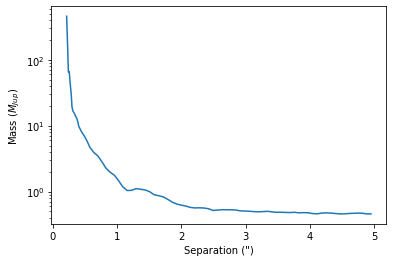

In [7]:
model_dir="/Users/connorvancil/Desktop/Astroresearch/Data/models/evolutionary_tracks/ATMO_CEQ/"
model_dir+=instrument_directories.get(instrument.lower())+model_nircam_mask_directories.get(instrument_mask.lower())

generate_mass_curve(age,distance,companion_mags,jwst_filt,sep,model_dir);
